<a href="https://colab.research.google.com/github/raunakk07/Immersion-Batch-Preparation/blob/main/AAAMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Red wine Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("sample_data/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


 Mapping Quality with indices

In [ ]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [ ]:
# use sample with frac = 1 to shuffle the dataframe
# we reset the indices since they change after
#shuffling the dataframe
df = df.sample(frac = 1).reset_index(drop = True)

df_train = df.head(1000)
df_test = df.tail(599)

# Implementing a decision tree on the dataset

In [ ]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

#initialize decision tree classifier class with max depth of 3
clf = tree.DecisionTreeClassifier(max_depth = 3)

#choose the columns you want to train on.
#these are the features for the model

cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']
#train the model on the provided features
# and mapped quality from before

clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=3)

Now, we test the accuracy of this model on the training set and the test set:

In [ ]:
#generate prediction on the training set
train_prediction = clf.predict(df_train[cols])
#generate prediction on the test set
test_prediction = clf.predict(df_test[cols])

#calculate the accuracy of the predictions on the training data set
train_accuracy = metrics.accuracy_score(df_train.quality,train_prediction)

#calculate the accuracy of the predictions on the test data set
test_accuracy = metrics.accuracy_score(df_test.quality,test_prediction)

print(train_accuracy*100,"%"," ",test_accuracy*100,"%")

98.9 %   59.432387312186975 %


Checking for multiple depth values

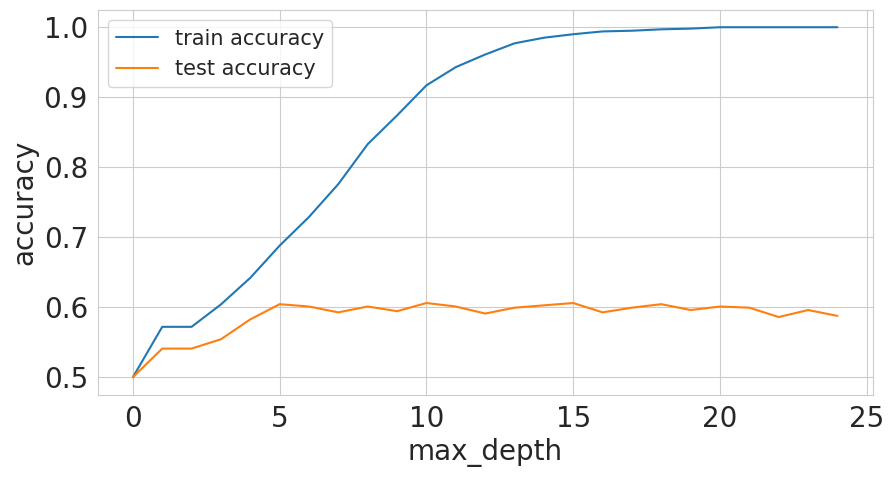

In [ ]:
from sklearn import tree
from sklearn import metrics

# import matplot lib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#this is out global size of label text on the plots
matplotlib.rc('xtick',labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

# this line ensures that the plot is displayed inside the notebook
%matplotlib inline

# initialize lists to store the accuracies for training and test dataset
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

#iterate over a few depth values
for depth in range(1,25):
  #init the model
  clf = tree.DecisionTreeClassifier(max_depth = depth)

  #columns for training
  cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

  #fit the model on the given features
  clf.fit(df_train[cols],df_train.quality)

  # create training and test predictions
  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])
  # calculate training and test accuracies
  train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
  test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

  # appemd accuracies
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

#create two plots using matplotlib and seaborn

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label = "train accuracy")
plt.plot(test_accuracies,label = "test accuracy")
plt.legend(loc = "upper left" , prop = {'size' : 15})
plt.xticks((range(0,26,5)))
plt.ylabel("accuracy" , size =20)
plt.xlabel("max_depth" , size =20)
plt.show()

# K-Fold Cross Validation

We can split any data into k-equal parts using KFold from scikit-learn. Each sample is assigned a value from 0 to k-1 when using k-fold cross validation


In [ ]:
# # import pandas adn model_selection module of scikit learn
# import pandas as pd
# from sklearn import model_selection

# if __name__ == "__main__":
#   # Training data is in csv file called train.csv
#   df = pd.read_csv("train.csv")
#   # we create a new column called kfold and fill it with -1
#   df["kfold"] = -1

#   # the next step is to randomize the rows of the data
#   df = df.sample(frac=1).reset_index(drop=True)

#   #initiate the kfold class from model_selection module
#   kf = model_selection.KFold(n_splits = 5)

#   # fill the mew kfold column
#   for fold,(trn_,val_) in enumerate(kf.split(X=df)):
#     df.loc[val_,'kfold'] = fold

#   # save the new csv with kfold column
#   df.to_csv("train_folds.csv", index = False)

# Startified K - folds Cross Validation

If you have a
skewed dataset for binary classification with 90% positive samples and only 10%
negative samples, you don't want to use random k-fold cross-validation. Using
simple k-fold cross-validation for a dataset like this can result in folds with all
negative samples. In these cases, we prefer using stratified k-fold cross-validation.
Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. So,
in each fold, you will have the same 90% positive and 10% negative samples. Thus,
whatever metric you choose to evaluate, it will give similar results across all folds.

In [ ]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
  # Training data is in a csv file called train.csv
  df = pd.read_csv("train.csv")
  # we create a new column called kfold and fill it with -1
  df["kfold"] = -1
  # the next step is to randomize the rows of the data
  df = df.sample(frac=1).reset_index(drop=True)
  # fetch targets
  y = df.target.values
  # initiate the kfold class from model_selection module
  kf = model_selection.StratifiedKFold(n_splits=5)
  # fill the new kfold column
  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
  # save the new csv with kfold column
  df.to_csv("train_folds.csv", index=False)
